In [1]:

import requests

from config import weather_api_key

import time


In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
coordinates = zip(lats, lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [7]:
#(6.2.6)

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ff94065ca6d745f5526d5e039874437d


In [9]:
# Import the datetime module from the datetime library
from datetime import datetime
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

 
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    time.sleep(1)

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 
    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saleaula
City not found. Skipping...
Processing Record 2 of Set 1 | segezha
Processing Record 3 of Set 1 | palu
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | tunduru
City not found. Skipping...
Processing Record 6 of Set 1 | kavieng
Processing Record 7 of Set 1 | divnomorskoye
Processing Record 8 of Set 1 | kununurra
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | vardo
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | pitimbu
Processing Record 14 of Set 1 | alexandria
Processing Record 15 of Set 1 | dwarka
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | santa maria
Processing Record 18 of Set 1 | cusco
Processing Record 19 of Set 1 | amderma
City not found. Skipping...
Processing Record 20 of Set 1 | hermanus
Processing R

Processing Record 35 of Set 4 | filotion
Processing Record 36 of Set 4 | grootfontein
Processing Record 37 of Set 4 | thompson
Processing Record 38 of Set 4 | belaya gora
Processing Record 39 of Set 4 | praia
Processing Record 40 of Set 4 | luderitz
Processing Record 41 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 42 of Set 4 | ostrovnoy
Processing Record 43 of Set 4 | dasoguz
Processing Record 44 of Set 4 | honningsvag
Processing Record 45 of Set 4 | bandarbeyla
Processing Record 46 of Set 4 | port arthur
Processing Record 47 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 48 of Set 4 | vredendal
Processing Record 49 of Set 4 | cabo san lucas
Processing Record 50 of Set 4 | saint-donat-de-montcalm
Processing Record 1 of Set 5 | taywarah
Processing Record 2 of Set 5 | nikolayevsk-na-amure
Processing Record 3 of Set 5 | gizo
Processing Record 4 of Set 5 | den helder
Processing Record 5 of Set 5 | mecca
Processing Record 6 of Set 5 | sunndalsor

Processing Record 24 of Set 8 | beloha
Processing Record 25 of Set 8 | grand bank
Processing Record 26 of Set 8 | kapuskasing
Processing Record 27 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 28 of Set 8 | manicore
Processing Record 29 of Set 8 | ijaki
City not found. Skipping...
Processing Record 30 of Set 8 | goderich
Processing Record 31 of Set 8 | varhaug
Processing Record 32 of Set 8 | suntar
Processing Record 33 of Set 8 | yarim
Processing Record 34 of Set 8 | brae
Processing Record 35 of Set 8 | libertador general san martin
Processing Record 36 of Set 8 | yar-sale
Processing Record 37 of Set 8 | saquarema
Processing Record 38 of Set 8 | abonnema
Processing Record 39 of Set 8 | verkhnevilyuysk
Processing Record 40 of Set 8 | luanda
Processing Record 41 of Set 8 | balkanabat
Processing Record 42 of Set 8 | great yarmouth
Processing Record 43 of Set 8 | vyatskiye polyany
Processing Record 44 of Set 8 | ardakan
Processing Record 45 of Set 8 | yazman


Processing Record 10 of Set 12 | lazarev
Processing Record 11 of Set 12 | adet
Processing Record 12 of Set 12 | ulladulla
Processing Record 13 of Set 12 | abu jubayhah
City not found. Skipping...
Processing Record 14 of Set 12 | veinticinco de mayo
Processing Record 15 of Set 12 | atar
Processing Record 16 of Set 12 | ponta delgada
Processing Record 17 of Set 12 | shahreza
Processing Record 18 of Set 12 | guangyuan
Processing Record 19 of Set 12 | awbari
Processing Record 20 of Set 12 | coihaique
Processing Record 21 of Set 12 | hamilton
Processing Record 22 of Set 12 | jishou
Processing Record 23 of Set 12 | shingu
Processing Record 24 of Set 12 | sisimiut
Processing Record 25 of Set 12 | humaita
Processing Record 26 of Set 12 | san antonio
Processing Record 27 of Set 12 | saint-leu
Processing Record 28 of Set 12 | baruun-urt
Processing Record 29 of Set 12 | golden
Processing Record 30 of Set 12 | nikki
Processing Record 31 of Set 12 | syasstroy
Processing Record 32 of Set 12 | charle

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Segezha,63.7415,34.3222,50.00,81,100,7.56,RU,2021-10-02 17:28:12
1,Palu,-0.8917,119.8707,75.11,96,90,1.95,ID,2021-10-02 17:24:12
2,Cape Town,-33.9258,18.4232,56.26,54,40,12.66,ZA,2021-10-02 17:26:41
3,Kavieng,-2.5744,150.7967,81.12,73,87,5.82,PG,2021-10-02 17:28:33
4,Divnomorskoye,44.5011,38.1353,58.42,68,9,10.04,RU,2021-10-02 17:28:36
5,Kununurra,-15.7667,128.7333,76.98,88,61,0.00,AU,2021-10-02 17:28:39
6,Vardo,70.3705,31.1107,48.70,85,98,26.42,NO,2021-10-02 17:28:42
7,Saint-Philippe,-21.3585,55.7679,71.22,81,38,12.80,RE,2021-10-02 17:28:45
8,Albany,42.6001,-73.9662,72.81,68,93,8.16,US,2021-10-02 17:27:25
9,Pitimbu,-7.4706,-34.8086,84.79,71,8,12.17,BR,2021-10-02 17:28:49


In [11]:
# Reordering the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_column_order_df = city_data_df[new_column_order]
new_column_order_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Segezha,RU,2021-10-02 17:28:12,63.7415,34.3222,50.00,81,100,7.56
1,Palu,ID,2021-10-02 17:24:12,-0.8917,119.8707,75.11,96,90,1.95
2,Cape Town,ZA,2021-10-02 17:26:41,-33.9258,18.4232,56.26,54,40,12.66
3,Kavieng,PG,2021-10-02 17:28:33,-2.5744,150.7967,81.12,73,87,5.82
4,Divnomorskoye,RU,2021-10-02 17:28:36,44.5011,38.1353,58.42,68,9,10.04
...,...,...,...,...,...,...,...,...,...
568,Kenai,US,2021-10-02 17:53:40,60.5544,-151.2583,41.14,78,1,0.00
569,Galle,LK,2021-10-02 17:53:42,6.0367,80.2170,78.49,88,18,7.96
570,Asau,RO,2021-10-02 17:53:44,46.4333,26.4000,51.76,67,7,1.14
571,Matagami,CA,2021-10-02 17:53:46,49.7502,-77.6328,55.51,67,75,4.61


In [12]:
# create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1633197229.2345984

In [15]:
today = time.strftime("%x")
today

'10/02/21'

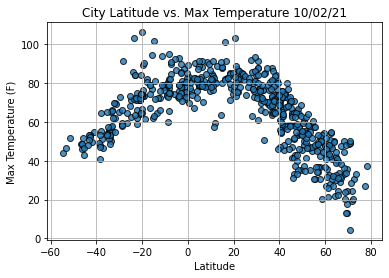

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

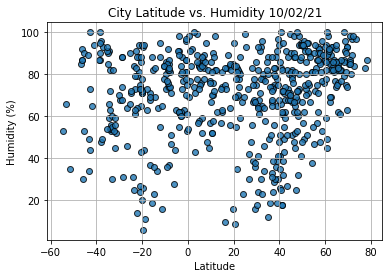

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

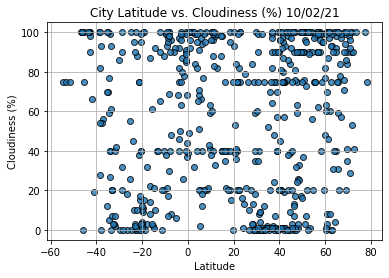

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

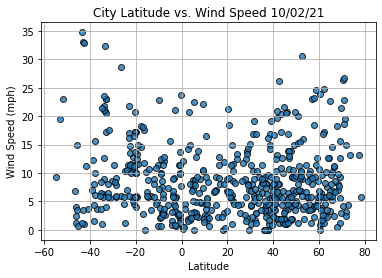

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [21]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [86]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [87]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

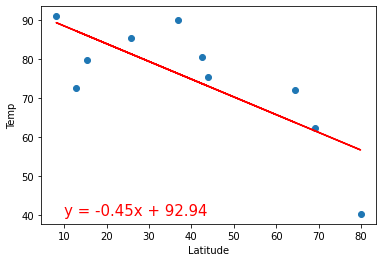

In [88]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

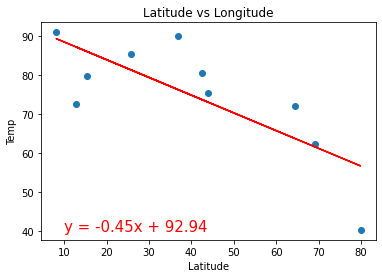

In [111]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats, temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats, regress_values, "r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title("Latitude vs Longitude")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [112]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [113]:
index13 = city_data_df.loc[13]
index13

City                  Santa Maria
Lat                      -29.6842
Lng                      -53.8069
Max Temp                     72.7
Humidity                       68
Cloudiness                      0
Wind Speed                   11.5
Country                        BR
Date          2021-10-02 17:28:55
Name: 13, dtype: object

In [115]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4       True
       ...  
568     True
569     True
570     True
571     True
572     True
Name: Lat, Length: 573, dtype: bool

In [117]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

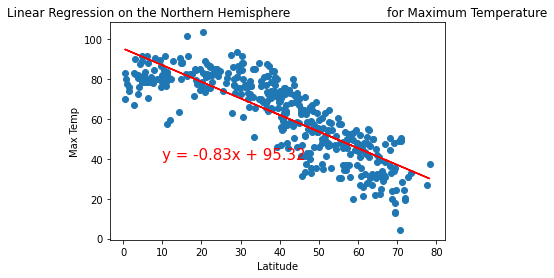

In [118]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

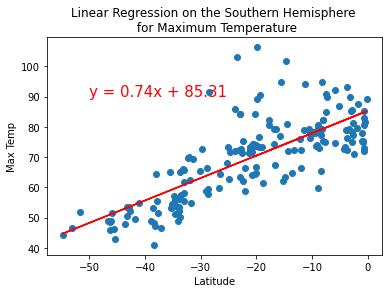

In [123]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

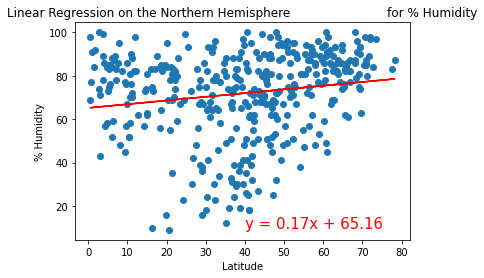

In [124]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

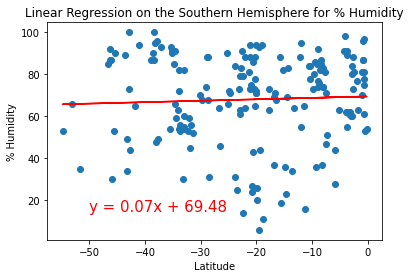

In [128]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere for % Humidity", "% Humidity", (-50, 15))

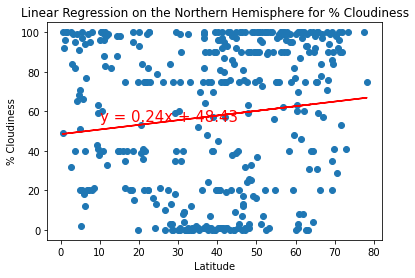

In [130]:
# Linear regression on the Northern Hemisphere  **SKILLDRILL**
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,55))

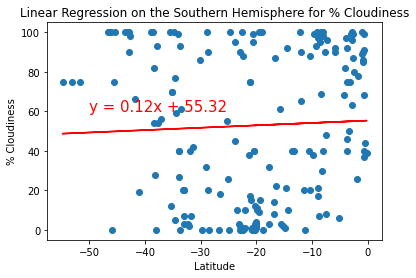

In [136]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

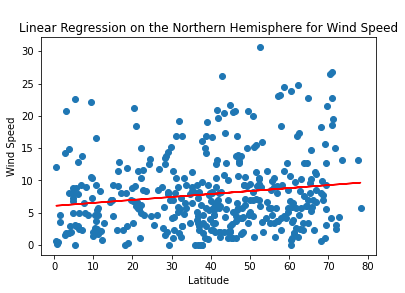

In [138]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

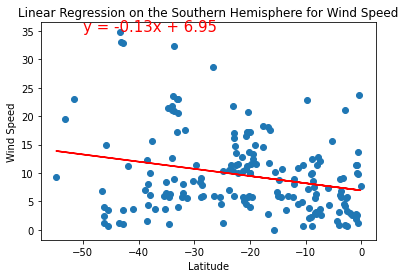

In [142]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))